In [0]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from statistics import median

In [0]:
def loadImage(image):
  img = cv2.imread(image,0)
  return img


In [0]:
def addNoise(arr):
  x,y = arr.shape[0],arr.shape[1]
  noisy = int((x*y) * 0.1)
  #print(noisy)
  f=0;
  for i in range(noisy):
   a = np.random.randint(0,x)
   b = np.random.randint(0,y)
   if(f==0):
     arr[a,b] = 0
     f=1
   else:
     arr[a,b] = 255
     f=0   

  return arr



In [0]:
def padding(arr,top,bottom,left,right):
  xlen = arr.shape[0]+2*left
  ylen = arr.shape[1]+2*top
  new = np.zeros([xlen,ylen],dtype=int)
  new[left:arr.shape[0]+left,top:arr.shape[1]+top] = arr
  new1 = np.array(new)
  #print(new1)
  #print(type(new1))
  return new1

In [0]:
def convol(arr,kernel):
  top = bottom = (kernel // 2)
  left = right = (kernel // 2)
  newImg = padding(arr,top,bottom,left,right)
  result = np.zeros_like(arr)
  list = []
  for x in range(arr.shape[1]):
    for y in range(arr.shape[0]): 
      list = np.array(newImg[y: y+kernel, x: x+kernel]).flatten()
      result[y,x] = median(list)
   
         
  return result

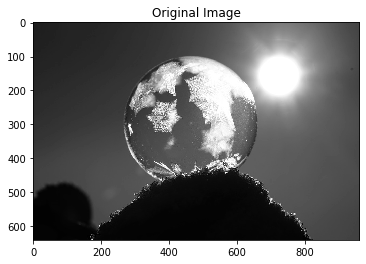

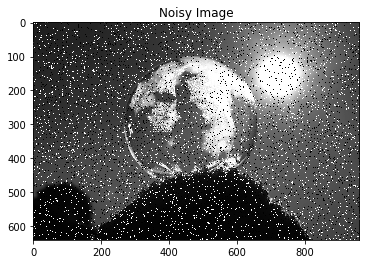

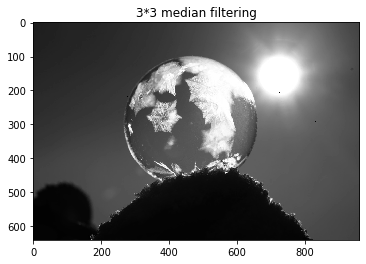

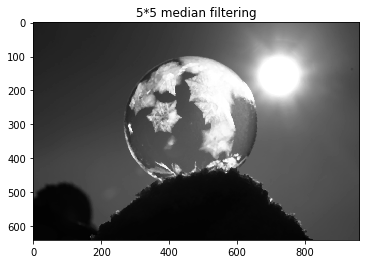

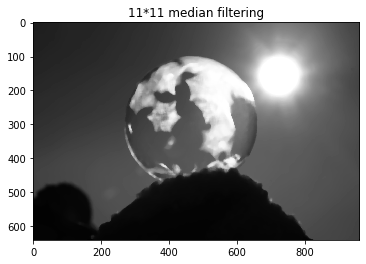

In [6]:

arr = loadImage('image_1.jpg')
plt.title('Original Image')
plt.imshow(arr, cmap='gray')
plt.show()

noisyarr = addNoise(arr)
plt.title('Noisy Image')
plt.imshow(noisyarr, cmap='gray')
plt.show()

list = [3,5,11]
for i in list:
  conImg = convol(noisyarr,i)
  plt.title('{}*{} median filtering'.format(i,i))
  plt.imshow(conImg, cmap='gray')
  plt.show()
  